In [36]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
df = pd.read_csv('Human_Resources.csv')
>>> print(df)


       satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
5                    0.41             0.50               2   
6                    0.10             0.77               6   
7                    0.92             0.85               5   
8                    0.89             1.00               5   
9                    0.42             0.53               2   
10                   0.45             0.54               2   
11                   0.11             0.81               6   
12                   0.84             0.92               4   
13                   0.41             0.55               2   
14                   0.36             0.56               2   
15      

In [20]:
list(df)

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years',
 'sales',
 'salary']

In [24]:
df['left'].mean()

0.2380825388359224

In [55]:
#The column 'left' has an integer value to represent whether or not the employee left the company with 1 indication they did
#and 0 indication they did not. Taking the mean of this data we can see 23% of employees did indeed leave the company.



In [40]:
satis= df['satisfaction_level']
left= df['left']



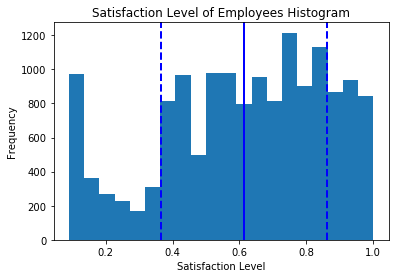

In [52]:
plt.hist(satis, bins=20)
plt.axvline(satis.mean(), color='b', linestyle='solid', linewidth=2)
plt.axvline(satis.mean() + satis.std(), color='b', linestyle='dashed', linewidth=2)
plt.axvline(satis.mean()-satis.std(), color='b', linestyle='dashed', linewidth=2)
plt.title('Satisfaction Level of Employees Histogram')
plt.xlabel('Satisfaction Level')
plt.ylabel('Frequency')


In [49]:
satis_1 = sorted(satis)
norm = np.random.normal(0, 1, 14999)
norm_1 = sorted(norm)

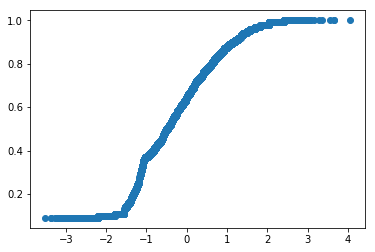

In [50]:
plt.plot(norm_1, satis_1, "o") 
plt.show() 

In [54]:
import scipy.stats as stats
stats.normaltest(satis)

NormaltestResult(statistic=1200.9584504966565, pvalue=1.6412924703269606e-261)